In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")
# Transform from long to wide format
# Assuming you want to pivot the data based on some columns
df_umsatz_wide = df_umsatz.pivot(
    index='Datum',  # Replace with your actual index columns
    columns='Warengruppe',  # Replace with the column you want to spread
    values='Umsatz'  # Replace with the column containing values to spread
).reset_index()
df_umsatz_wide.columns = ['Datum', 'Bread', 'Rolls', 'Croissant', 'Confectionery', 'Cake', 'Seasonal Bread']
print(df_umsatz_wide.head())
df_umsatz.info()

        Datum       Bread       Rolls   Croissant  Confectionery        Cake  \
0  2013-07-01  148.828353  535.856285  201.198426      65.890169  317.475875   
1  2013-07-02  159.793757  546.780787  265.261254      74.543917  383.628682   
2  2013-07-03  111.885594  427.343259  210.260241      69.262728  305.523072   
3  2013-07-04  168.864941  454.859641  190.686641      61.490175  308.408168   
4  2013-07-05  171.280754  492.818804  181.644870      86.759861  355.518770   

   Seasonal Bread  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datum        9334 non-null   object 
 1   Warengruppe  9334 non-null   int64  
 2   Umsatz       9334 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 218.9+ KB


In [4]:
df_kiwo = pd.read_csv("kiwo.csv")
print(df_kiwo.head())
df_kiwo.info()

        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Datum        72 non-null     object
 1   KielerWoche  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [5]:
df_wetter = pd.read_csv("wetter.csv")
print(df_wetter.head())
df_wetter.info()

        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                2601 non-null   object 
 1   Bewoelkung           2591 non-null   float64
 2   Temperatur           2601 non-null   float64
 3   Windgeschwindigkeit  2601 non-null   int64  
 4   Wettercode           1932 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 101.7+ KB


In [6]:
#mergen der Dataframes, kielerwoche df wird als leftjoin gemerged damit alle Datenpukte erhalten bleiben

df_umsatz_kiwo_wetter = df_umsatz_wide.merge(df_kiwo, on='Datum', how='left').merge(df_wetter, on='Datum', how='left')
df_umsatz_kiwo_wetter['KielerWoche'] = df_umsatz_kiwo_wetter['KielerWoche'].fillna(0)
print(df_umsatz_kiwo_wetter.head())
print(df_umsatz_kiwo_wetter.tail())

        Datum       Bread       Rolls   Croissant  Confectionery        Cake  \
0  2013-07-01  148.828353  535.856285  201.198426      65.890169  317.475875   
1  2013-07-02  159.793757  546.780787  265.261254      74.543917  383.628682   
2  2013-07-03  111.885594  427.343259  210.260241      69.262728  305.523072   
3  2013-07-04  168.864941  454.859641  190.686641      61.490175  308.408168   
4  2013-07-05  171.280754  492.818804  181.644870      86.759861  355.518770   

   Seasonal Bread  KielerWoche  Bewoelkung  Temperatur  Windgeschwindigkeit  \
0             NaN          0.0         6.0     17.8375                 15.0   
1             NaN          0.0         3.0     17.3125                 10.0   
2             NaN          0.0         7.0     21.0750                  6.0   
3             NaN          0.0         7.0     18.8500                  7.0   
4             NaN          0.0         5.0     19.9750                 12.0   

   Wettercode  
0        20.0  
1         Na

In [7]:
df_umsatz_kiwo_wetter.describe()

,Bread,Rolls,Croissant,Confectionery,Cake,Seasonal Bread,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,1819.000000,1819.000000,1819.000000,1766.000000,1819.000000,292.000000,1819.000000,1807.000000,1816.00000,1816.000000,1360.000000
mean,122.142509,402.497911,163.340920,87.954042,276.795509,66.916635,0.024739,4.688434,12.20778,10.996696,36.772059
std,40.299209,139.660208,75.578308,35.318400,99.472740,32.372569,0.155371,2.650726,7.26073,4.128913,27.152329
min,23.108406,174.999832,37.739245,27.433726,121.493282,7.051201,0.000000,0.000000,-8.47500,3.000000,0.000000
25%,96.436728,289.050638,105.589349,66.024297,228.972912,41.559645,0.000000,3.000000,6.37500,8.000000,10.000000
50%,120.053295,370.834527,142.808943,79.986363,265.958912,62.909351,0.000000,6.000000,12.04375,10.000000,28.000000
75%,144.264423,492.837815,201.950786,98.345934,307.620893,86.238825,0.000000,7.000000,18.12500,13.000000,61.000000
max,416.788764,1203.431130,565.941679,430.500089,1879.461831,172.865985,1.000000,8.000000,31.43750,35.000000,95.000000


In [8]:
# die Wettercodes 1, 2 und 4 enthalten NaN-Werte (Not a Number-Werte) und Bewoelkung ebenfalls
df_umsatz_kiwo_wetter.info()
print("Start date:", df_umsatz_kiwo_wetter['Datum'].min())
print("End date:", df_umsatz_kiwo_wetter['Datum'].max())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                1819 non-null   object 
 1   Bread                1819 non-null   float64
 2   Rolls                1819 non-null   float64
 3   Croissant            1819 non-null   float64
 4   Confectionery        1766 non-null   float64
 5   Cake                 1819 non-null   float64
 6   Seasonal Bread       292 non-null    float64
 7   KielerWoche          1819 non-null   float64
 8   Bewoelkung           1807 non-null   float64
 9   Temperatur           1816 non-null   float64
 10  Windgeschwindigkeit  1816 non-null   float64
 11  Wettercode           1360 non-null   float64
dtypes: float64(11), object(1)
memory usage: 170.7+ KB
Start date: 2013-07-01
End date: 2018-07-31


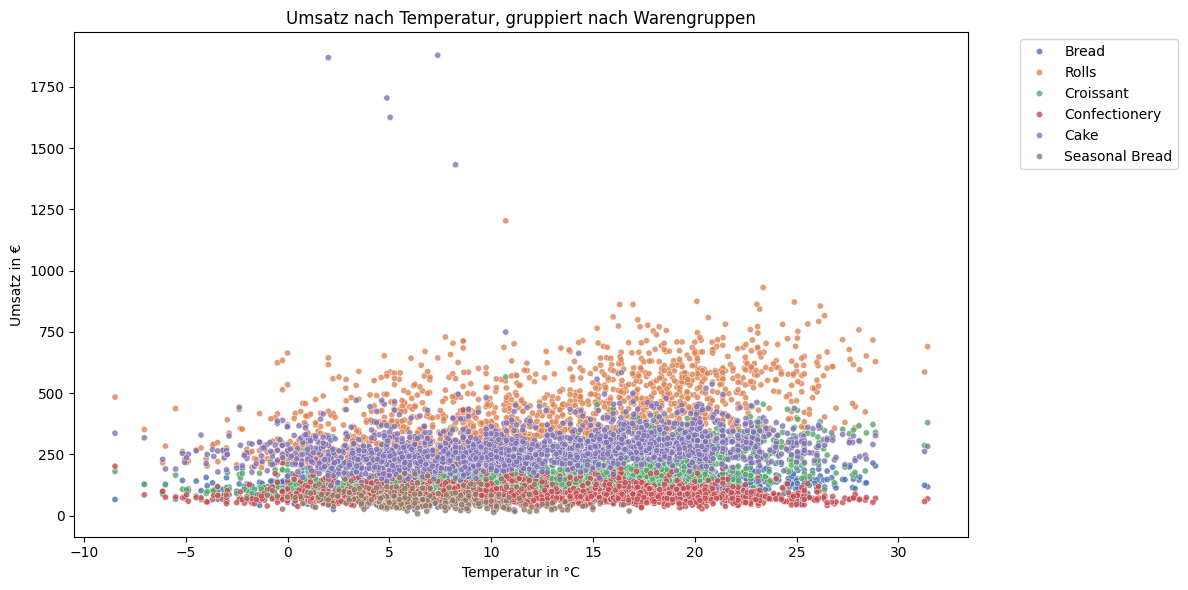

In [9]:
# Melt the DataFrame to create long format for plotting
df_melted = pd.melt(df_umsatz_kiwo_wetter, 
                    id_vars=['Datum', 'Temperatur', 'KielerWoche', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode'], 
                    value_vars=['Bread', 'Rolls', 'Croissant', 'Confectionery', 'Cake', 'Seasonal Bread'],
                    var_name='Warengruppe', 
                    value_name='Umsatz')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_melted,
                x='Temperatur',
                y='Umsatz',
                hue='Warengruppe',
                alpha=0.8,
                palette='deep',
                s=20)

plt.title('Umsatz nach Temperatur, gruppiert nach Warengruppen')
plt.xlabel('Temperatur in °C')
plt.ylabel('Umsatz in €')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

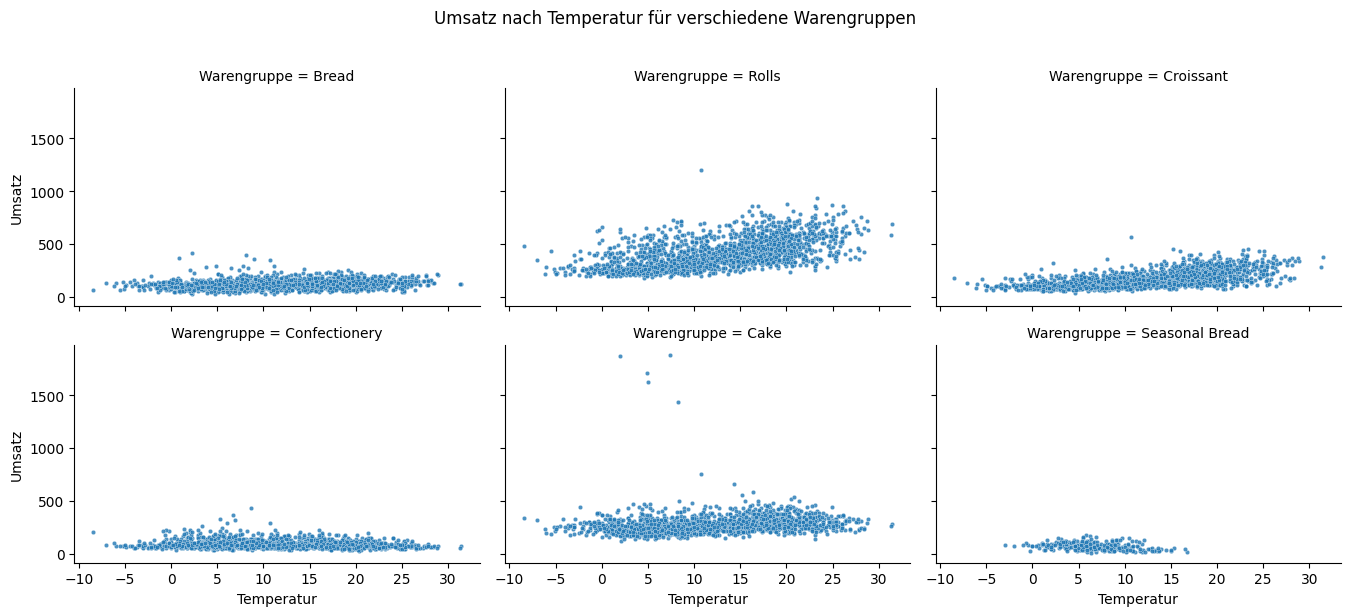

In [10]:
g = sns.FacetGrid(df_melted, col="Warengruppe", col_wrap=3, height=3, aspect=1.5)
g.map(sns.scatterplot, "Temperatur", "Umsatz", alpha=0.8, s=10)
g.add_legend()
g.fig.suptitle('Umsatz nach Temperatur für verschiedene Warengruppen', y=1.02)
g.fig.tight_layout()
plt.show()


In [11]:
# plt.figure(figsize=(12, 6))
# # Temperatur in Kategorien einteilen
# df_umsatz_kiwo_wetter['Temp_Kategorie'] = pd.cut(df_umsatz_kiwo_wetter['Temperatur'],
#                                                 bins=[0, 10, 15, 20, 25, 30],
#                                                 labels=['0-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C'])

# sns.boxplot(data=df_umsatz_kiwo_wetter,
#            x='Temp_Kategorie',
#            y='Umsatz',
#            hue='KielerWoche')

# plt.title('Umsatzverteilung nach Temperaturkategorien und KielerWoche')
# plt.xlabel('Temperaturbereich')
# plt.ylabel('Umsatz in €')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


plt.figure(figsize=(12, 6))

# Melt the DataFrame to long format
df_melted = pd.melt(df_umsatz_kiwo_wetter, 
                    id_vars=['Datum', 'Temperatur', 'KielerWoche', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode'],  
                    value_vars=['Bread', 'Rolls', 'Croissant', 'Confectionery', 'Cake', 'Seasonal Bread'],
                    var_name='Warengruppe', 
                    value_name='Umsatz')

# Create Temperatur Kategorien
df_melted['Temp_Kategorie'] = pd.cut(df_melted['Temperatur'],
                                     bins=[0, 10, 15, 20, 25, 30],
                                     labels=['0-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C'])

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted,
            x='Temp_Kategorie',
            y='Umsatz',
            hue='Kiwo')

plt.title('Umsatzverteilung nach Temperaturkategorien und KielerWoche')
plt.xlabel('Temperaturbereich')
plt.ylabel('Umsatz in €')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Kiwo` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

/tmp/ipykernel_6231/969659384.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_umsatz_kiwo_wetter.pivot_table(


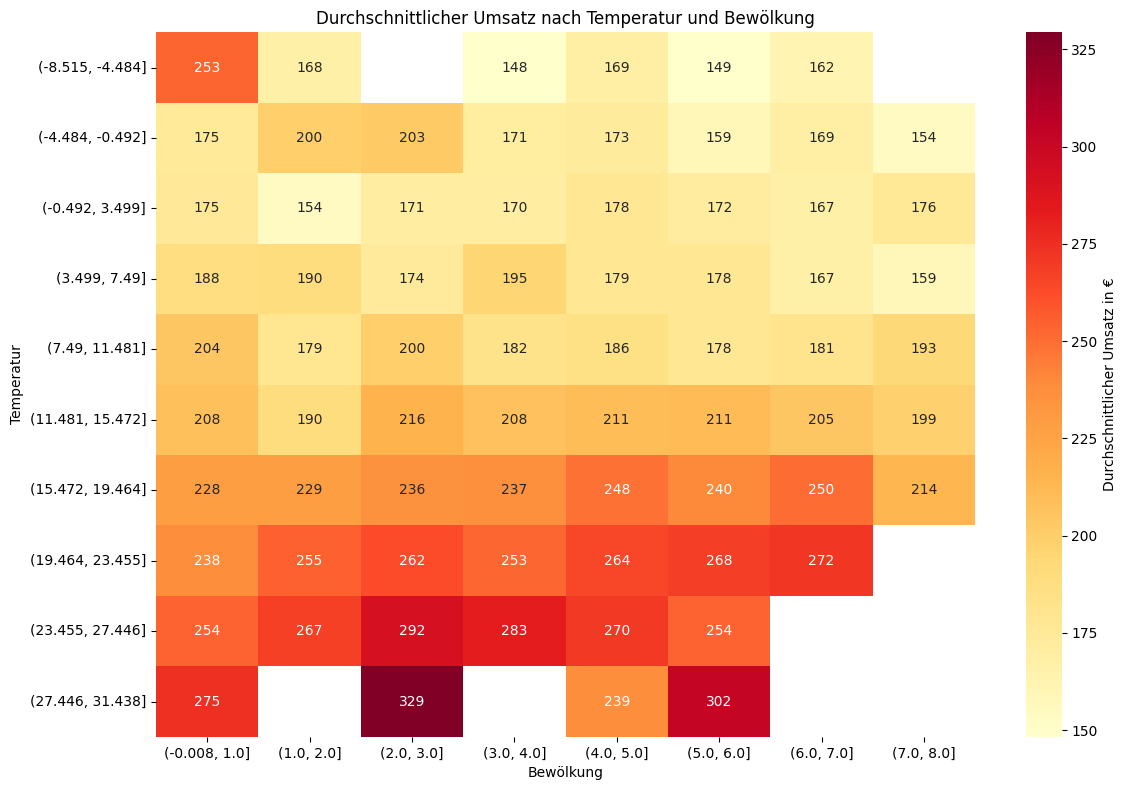

In [ ]:
plt.figure(figsize=(12, 8))
# Durchschnittlichen Umsatz für Temperatur-Bewölkungs-Kombinationen berechnen
pivot_table = df_umsatz_kiwo_wetter.pivot_table(
    values='Umsatz',
    index=pd.cut(df_umsatz_kiwo_wetter['Temperatur'], bins=10),  # 10 Temperaturkategorien
    columns=pd.cut(df_umsatz_kiwo_wetter['Bewoelkung'], bins=8),  # 8 Bewölkungskategorien
    aggfunc='mean'
)

sns.heatmap(pivot_table, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.0f',
            cbar_kws={'label': 'Durchschnittlicher Umsatz in €'})

plt.title('Durchschnittlicher Umsatz nach Temperatur und Bewölkung')
plt.xlabel('Bewölkung')
plt.ylabel('Temperatur')
plt.tight_layout()
plt.show()